# Importing Required Libraries

In [11]:
import pandas as pd                     
import matplotlib.pyplot as plt         
import seaborn as sns                  
from sklearn.cluster import KMeans     
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score, davies_bouldin_score  
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster  

# Load the Dataset

In [12]:
df = pd.read_csv("C:\\Users\\amish\\OneDrive\\Documents\\Custom Office Templates\\Mall_Customers.csv")     
print(df.head())                        

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Select Relevant Features

From the full data, we’ll select only the columns needed for clustering — like income and spending score.

In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]   # Features for clustering

# Feature Scaling

In [14]:
scaler = StandardScaler()       
X_scaled = scaler.fit_transform(X)  

# Find Best Number of Clusters Using Elbow Method

C:\Users\amish\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amish\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amish\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amish\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_

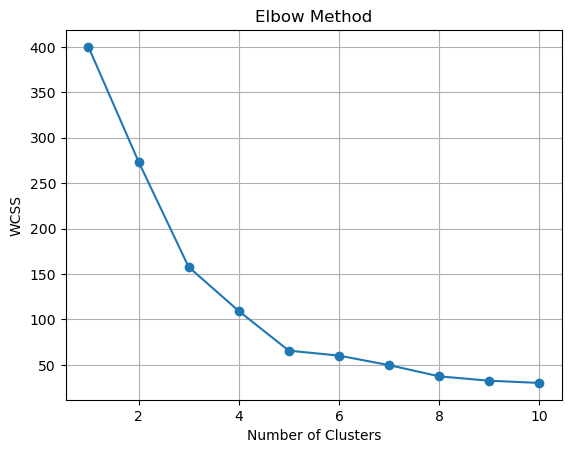

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')     
plt.grid(True)
plt.show()

# K-Means Clustering

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)    
y_kmeans = kmeans.fit_predict(X_scaled)           
df['KMeans_Cluster'] = y_kmeans                  


C:\Users\amish\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize K-Means Clusters

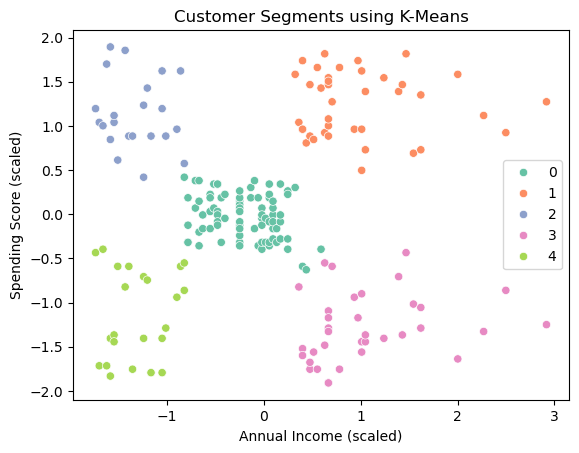

In [23]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='Set2')
plt.title('Customer Segments using K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [24]:
silhouette = silhouette_score(X_scaled, y_kmeans)
db_index = davies_bouldin_score(X_scaled, y_kmeans)

print("Silhouette Score (K-Means):", silhouette)
print("Davies–Bouldin Index (K-Means):", db_index)


Silhouette Score (K-Means): 0.5546571631111091
Davies–Bouldin Index (K-Means): 0.5722356162263352


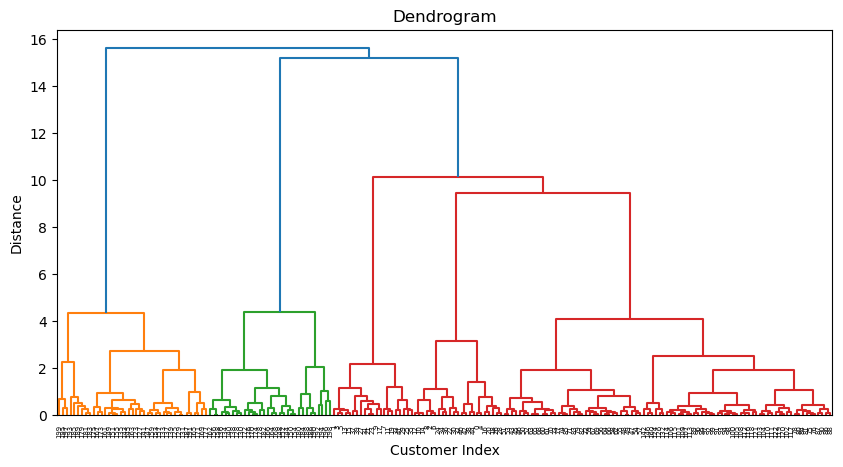

In [25]:
linked = linkage(X_scaled, method='ward')

# Show Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()


In [20]:
hc_clusters = fcluster(linked, 5, criterion='maxclust')
df['HC_Cluster'] = hc_clusters


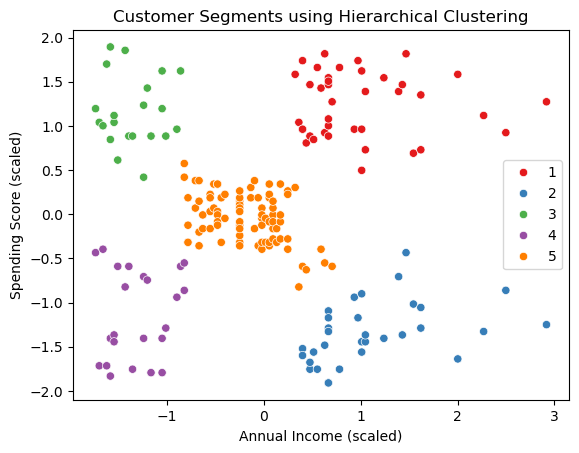

In [21]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hc_clusters, palette='Set1')
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()
